In [1]:
import FinanceDataReader as fdr
import requests, lxml
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time, datetime

### STOCK List&Chart

In [6]:
start = '2021.05.30'
end = '2022.05.29'

In [3]:
dr_krx = fdr.StockListing('NASDAQ')

100%|█████████████████████████████████████| 4629/4629 [00:09<00:00, 473.83it/s]


In [4]:
dr_krx[:10]

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,TSLA,Tesla Inc,자동차 및 자동차 부품,531010
5,GOOG,Alphabet Inc Class C,소프트웨어 및 IT서비스,572010
6,FB,Meta Platforms Inc Class A,소프트웨어 및 IT서비스,572010
7,NVDA,NVIDIA Corp,반도체 및 반도체 장비,571010
8,ONBPP,Old National Bancorp 40 Depositary Shares Rep ...,은행,551010
9,PEP,PepsiCo Inc,음료,541010


<AxesSubplot:xlabel='Date'>

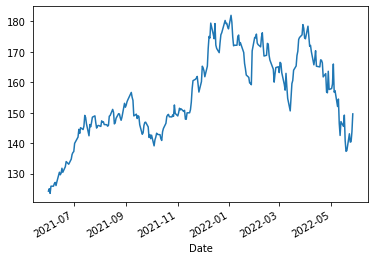

In [8]:
df = fdr.DataReader('AAPL', start, end)
df['Close'].plot()

### Crawling

In [2]:
# options
headers = {
    "User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.61 Safari/537.36"
}

# params = {
#     'q' : 'AAPL',
#     'hl' : 'en-US',
#     'gl' : 'US',
#     'ceid' : 'US%3Aen'
# }
# response = requests.get("https://news.google.com/search", headers=headers, params=params)

### title xpath 형식

//*[@id="quoteNewsStream-0-Stream"]/ul/li[1]/div/div/div[2]/h3/a/text()  
//*[@id="quoteNewsStream-0-Stream"]/ul/li[6]/div/div/div[2]/h3/a/text()  
//*[@id="quoteNewsStream-0-Stream"]/ul/li[8]/div/div/div[2]/h3/a/text()  
//*[@id="quoteNewsStream-0-Stream"]/ul/li[19]/div/div/div[2]/h3/a/text()  

In [3]:
titles = []

# selenium setting
url = "https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch"
whileSeconds = 10
SCROLLTIME = 60

# protect deny
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.61 Safari/537.36')

# start, end
start = datetime.datetime.now()
end = start + datetime.timedelta(seconds=whileSeconds)    

# open yahoo finance
driver = webdriver.Chrome(executable_path='/Users/parkdoyeong/Documents/Paper/STOCK2022/chromedriver', options=options)
driver.get(url)

# scroll
# excute_script method
# while True:
#     driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
#     time.sleep(whileSeconds)
    
#     if datetime.datetime.now() > end:
#         break

# scroll
# send_kes method
driver.implicitly_wait(whileSeconds)
body = driver.find_element_by_css_selector('body') 

for i in range(SCROLLTIME):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.3)

# xpath element -> string
title = driver.find_element(By.XPATH, '//*[@id="quoteNewsStream-0-Stream"]/ul')
title = title.get_attribute('innerText')
titles.append(title)

driver.close()

/var/folders/xw/rbcyfp692g3c5w_0qcls7ncm0000gn/T/ipykernel_24070/2809960807.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/Users/parkdoyeong/Documents/Paper/STOCK2022/chromedriver', options=options)
/var/folders/xw/rbcyfp692g3c5w_0qcls7ncm0000gn/T/ipykernel_24070/2809960807.py:33: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  body = driver.find_element_by_css_selector('body')


In [19]:
len(titles[0].split('\n'))

513

In [15]:
len(titles[0].split('\n'))

1233